# Regresión logística binaria: Perceptrón

Regresión logística binaria es un modelo probabilístico para clasificación en dos clases, $y\in\{0,1\}$,
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})=\operatorname{Ber}(y\mid\mu)%
\quad\text{con}\quad%
\mu=\sigma(a)%
\quad\text{y}\quad%
a=\boldsymbol{w}^t\boldsymbol{x}%
\quad\text{($b$ absorbido en $\boldsymbol{w}$)}$$
**Perceptrón** puede verse como una variante con escalón Heaviside, $H(a)=\mathbb{I}(a>0)$, en lugar de sigmoide:
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})=\operatorname{Ber}(y\mid\mu)%
\quad\text{con}\quad%
\mu=H(a)%
\quad\text{y}\quad%
a=\boldsymbol{w}^t\boldsymbol{x}%
\quad\text{($b$ absorbido en $\boldsymbol{w}$)}$$

En el caso de regresión logística, el MLE de $\boldsymbol{w}$ puede obtenerse mediante descenso por gradiente estocástico (con minibatch de talla uno):
$$\boldsymbol{w}_{t+1}=\boldsymbol{w}_t-\eta_t(\mu_n-y_n)\boldsymbol{x}_n$$
En el caso de Perceptrón, el MLE de $\boldsymbol{w}$ no puede obtenerse del mismo modo ya que la log-verosimilitud no es diferenciable. No obstante, $\boldsymbol{w}$ puede aprenderse mediante el **algoritmo Perceptrón**, iterando sobre los datos con:
$$\boldsymbol{w}_{t+1}=\boldsymbol{w}_t-\eta_t(\hat{y}_n-y_n)\boldsymbol{x}_n$$
Nótese que el algoritmo Perceptrón es prácticamente idéntico a SGD aplicado a regresión logística binaria.

**Ejemplo:** datos sintéticos 2d y modelo de sesgo nulo ($b=0$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

N, n_clusters_per_class, class_sep = 20, 2, 1.0
X, y = make_classification(n_samples=N, n_features=2, n_redundant=0, n_classes=2, 
    n_clusters_per_class=n_clusters_per_class, class_sep=class_sep) #, random_state=1)
print(np.c_[X, y])

[[ 2.88459038  1.68392024  1.        ]
 [ 1.38482373 -0.72765337  0.        ]
 [-0.72185908 -0.82010292  0.        ]
 [ 0.19353761 -0.44549625  0.        ]
 [ 1.26750935 -0.6329772   0.        ]
 [ 0.20282077  1.631391    1.        ]
 [-1.40274226  1.88794143  1.        ]
 [-1.17142961  0.36338165  1.        ]
 [-0.68831234  0.02109745  1.        ]
 [-1.23606105 -1.58215173  0.        ]
 [-0.39575254  1.80004689  1.        ]
 [-0.51493431  0.27809442  1.        ]
 [ 1.07682224  0.82382446  1.        ]
 [-0.67257116 -0.57666582  0.        ]
 [-1.53979422 -1.67563298  0.        ]
 [ 0.63593391  0.7924392   1.        ]
 [-1.26005451  1.9405185   1.        ]
 [-0.76059126 -0.81032169  0.        ]
 [ 2.2367445  -1.46908817  0.        ]
 [ 0.74161066 -0.705488    0.        ]]


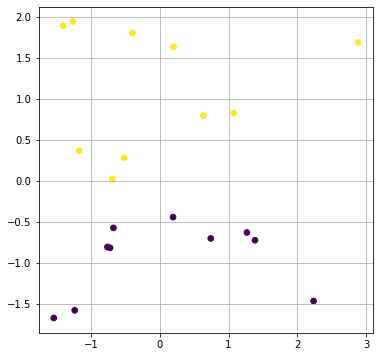

In [2]:
fig, ax = plt.subplots(figsize=(6, 6)); ax.grid(); ax.scatter(*X.T, c=y, s=32)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
XX = np.c_[np.ravel(xx), np.ravel(yy)]

In [3]:
w, eta = np.zeros((N + 1, 2)), 0.3
for n in np.arange(N):
    # mun = 1.0 / (1.0 + np.exp(- w[n, :] @ X[n, :]))
    mun = np.heaviside(w[n, :] @ X[n, :], 0.0)
    grad = mun - y[n]
    w[n+1, :] = w[n, :] - eta * (mun - y[n]) * X[n, :]
    print(n+1, mun, w[n+1])

1 0.0 [0.86537711 0.50517607]
2 1.0 [0.44992999 0.72347208]
3 0.0 [0.44992999 0.72347208]
4 0.0 [0.44992999 0.72347208]
5 1.0 [0.06967719 0.91336525]
6 1.0 [0.06967719 0.91336525]
7 1.0 [0.06967719 0.91336525]
8 1.0 [0.06967719 0.91336525]
9 0.0 [-0.13681651  0.91969448]
10 0.0 [-0.13681651  0.91969448]
11 1.0 [-0.13681651  0.91969448]
12 1.0 [-0.13681651  0.91969448]
13 1.0 [-0.13681651  0.91969448]
14 0.0 [-0.13681651  0.91969448]
15 0.0 [-0.13681651  0.91969448]
16 1.0 [-0.13681651  0.91969448]
17 1.0 [-0.13681651  0.91969448]
18 0.0 [-0.13681651  0.91969448]
19 0.0 [-0.13681651  0.91969448]
20 0.0 [-0.13681651  0.91969448]


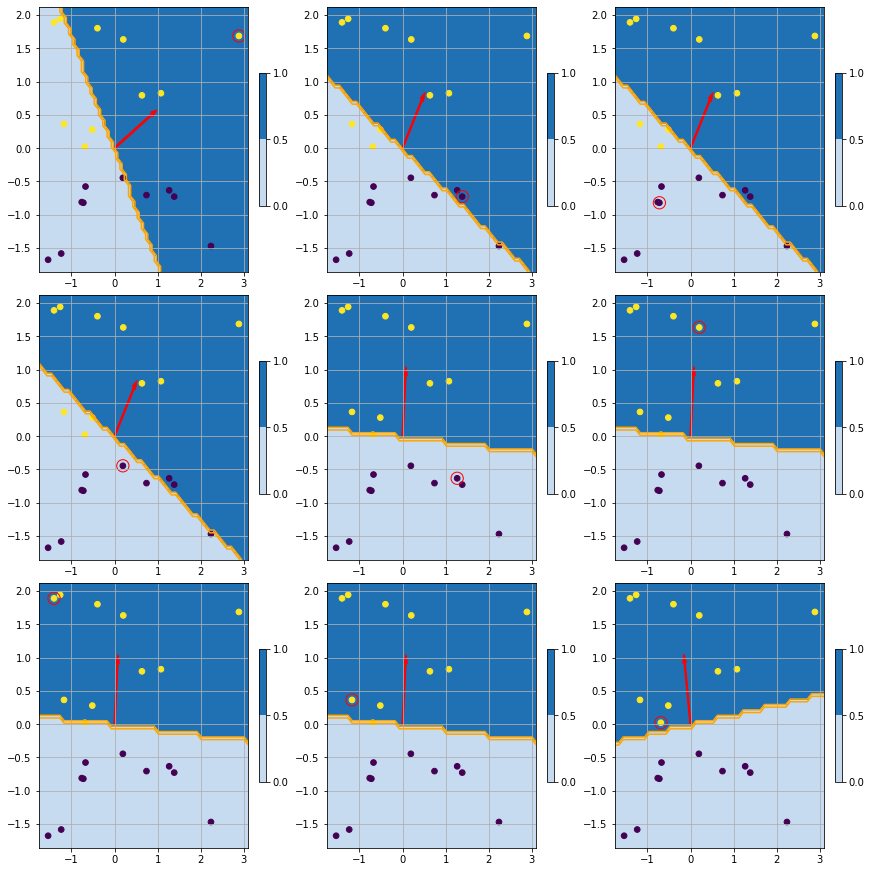

In [4]:
nrows = ncols = int(min(3, np.ceil(np.sqrt(N))));
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12), constrained_layout=True)
for n in np.arange(min(N, nrows * ncols)):
    ax = axes.flat[n]; ax.axis('off'); ax = fig.add_subplot(nrows, ncols, n + 1); ax.grid()
    z = lambda x: w[n + 1, :] @ x
    zz = np.heaviside(np.apply_along_axis(z, 1, XX), 0.0)
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 1, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5)
    ax.arrow(0, 0, w[n+1, 0], w[n+1, 1], width=.03, facecolor='red', edgecolor='red')
    ax.scatter(*X.T, c=y, s=32); ax.scatter(X[n, 0], X[n, 1], facecolors='none', edgecolors='red', s=150)